# Overview

### 1. Dataset

This dataset was collected from the Global Health Observatory (GHO) data repository under World Health Organization (WHO) from year 2000-2015. More information of the dataset can be found at:https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

### 2. Main Steps We Will Follow

* Import the algorithm of interest from sklearn.
* Split the dataset into a training set and test set.
* Initialize the model
* Fit the model on Train data.
* Predict the target on Test Data
* Evaluate the model on Test Data.

## Setting Up Our Environment

In [110]:
# Global Imports
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt   # plotting
from sklearn.model_selection import train_test_split  # ML data splits
from sklearn.preprocessing import MinMaxScaler # ML preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## The data set

In [163]:
#Import dataset
df = pd.read_csv('C:/Users/kimng/Desktop/EDPY506/Code Presentation/Life Expectancy Data.csv')
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [40]:
#check if there were any missing data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [53]:
# drop missing data list-wise
df.dropna(inplace=True)

#reset index -- this is to replace old data index with index based on current data.
df = df.reset_index(drop=True)

# get new data dimension
df.shape 

(1649, 22)

After missing data deletion, the final dataset has 1649 instances and 22 columns. For simplicity, we will predict life expectancy from all columns except for 'Country' (number of predictors = 20). 'Status' will be recoded into binary value (0 = developing; 1= developed).

In [54]:
df.loc[df['Status'] == "Developing", 'Status'] = 0
df.loc[df['Status'] == "Developed", 'Status'] = 1
df['Status'] = df['Status'].apply(np.int64)

## Split the dataset into a training set and test set.

Note that the splits will be stratified based on 'Status' as the numbers of developed and developing countries are imbalance

In [47]:
df.columns # get list of column names

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [77]:
# Separate the features (X) and target (y)

feature_names = ['Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

target = ['Life expectancy ']

In [78]:
# Split into training, test sets (80%, 20%)
stratifyCategory = ['Status']
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(test_size = .20, random_state=42)

for train_index, test_index in split.split(df, df[stratifyCategory]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
    
train_set = pd.DataFrame(train_set)
test_set = pd.DataFrame(test_set)

In [113]:
X_train = train_set[feature_names]
y_train = train_set[target]

X_test = test_set[feature_names]
y_test = test_set[target]

In [80]:
print(train_set.shape)
print(test_set.shape)

(1319, 22)
(330, 22)


## Initialize and fit the model on training data

In [84]:
#Initialize
lm = LinearRegression()

#Fit on training set
model = lm.fit(X_train, y_train)

In [124]:
#Predict y_train
y_pred_train = model.predict(X_train)

## Predict the target on Test Data

In [112]:
#Predict y_test
y_pred = model.predict(X_test)

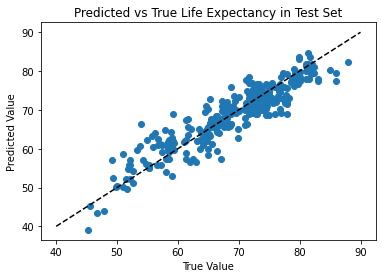

In [123]:
plt.scatter(y_test, y_pred)
plt.plot([40, 90], [40, 90], '--k') #identity line; predicted = true value
plt.title('Predicted vs True Life Expectancy in Test Set')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

## Evaluate the model on Test Data.

In [126]:
MAE_test = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', MAE_test)

MSE_test = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE_test)

RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE_test)

R2_test = r2_score(y_test, y_pred)
print('Coefficient of Determination (R2):', R2_test)

Mean Absolute Error: 2.574365860440424
Mean Squared Error: 11.175236079207012
Root Mean Squared Error: 3.342938240411721
Coefficient of Determination (R2): 0.8431376684247751


## Compare performance on training vs test sets

To examine if the model over- or under- fit the data

In [162]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_train = r2_score(y_train, y_pred_train)

metric = {'Dataset': ['Training', 'Test'], 
          'MAE': [MAE_train, MAE_test],
          'MSE': [MSE_train, MSE_test],
          'RMSE': [RMSE_train, RMSE_test],
          'R2': [R2_train, R2_test]}
metric = pd.DataFrame(metric)

metric

,Dataset,MAE,MSE,RMSE,R2
0,Training,2.745394,12.840809,3.583407,0.837169
1,Test,2.574366,11.175236,3.342938,0.843138


***Model seems to perform similarly on both the training and test sets - All evaluation metrics results were similar between training and test sets.***

### Actual vs predicted plot of both training and test sets

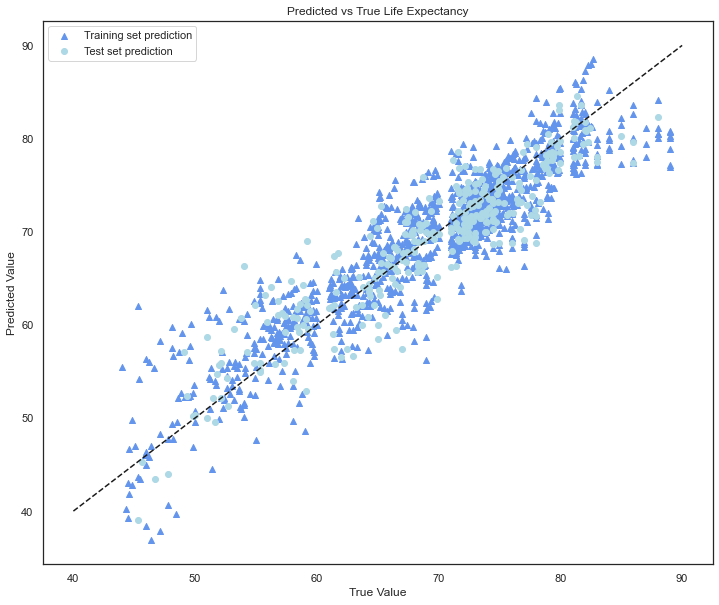

In [148]:
plt.figure(figsize=(12, 12))
plt.scatter(y_train, y_pred_train, marker = "^", color = 'cornflowerblue', label='Training set prediction')
plt.scatter(y_test, y_pred, color='lightblue', label='Test set prediction')
plt.plot([40, 90], [40, 90], '--k') #identity line; predicted = true value
plt.title('Predicted vs True Life Expectancy')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

## Looking at Linear Regression slope coefficients

The MAE, MSE, and RMSE were slightly higher in training set. In case you have concerns on overfitting, we can check feature coefficients to see if any features can be removed to reduce model complexity.

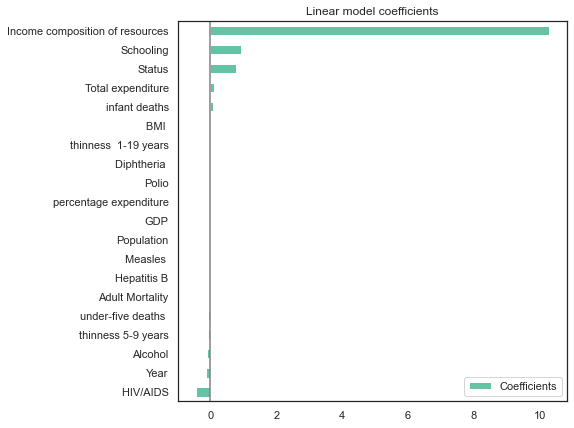

In [165]:
coefs = pd.DataFrame(
   model.coef_.reshape(-1),
   columns=['Coefficients'], index=X_train.columns
)
#Sort coefficient
coefs = coefs.sort_values(by=['Coefficients'])

coefs.plot(kind='barh', figsize=(9, 7), colormap = 'Set2')
plt.title('Linear model coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

As seen in the plot above, there are a lot of features that do not seem to contribute much to the life expectancy contributions. To reduce model complexity, we can use methods like LASSO (Least Absolute Shrinkage Selector Operator) regression. As discussed in the lecture last week, this method will make slope coefficients of the less important features into zero.